---
# **The Black-Scholes Equation Minimization**


---

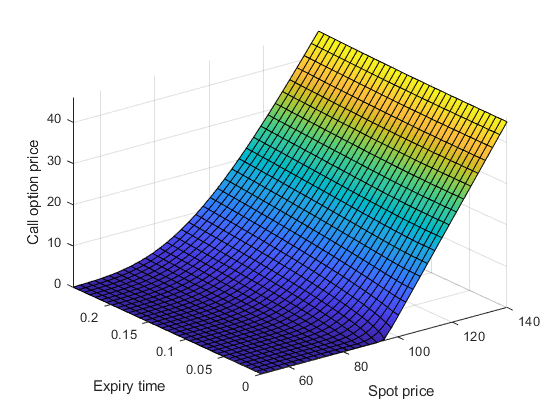

## Introduction

Ce projet a pour but de minimiser la formule de Black-Scholes en utilisant differents algorithmes.

  Il s'agit d'une équation mathématique utilisée pour estimer le prix d'une option financière européenne, développée par trois économistes, Fischer Black, Myron Scholes et Robert Merton, dans les années 1970.

## Formule de Black-Scholes

### Description de la fonction

La formule de Black-Scholes pour le prix d'un call (option d'achat) européen peut être exprimée comme suit  :

$obj = SN(d_1) - K\mathrm{e}^{-rT}N(d_2)$

Et pour un put (option de vente) européen (P) :

$obj = K\mathrm{e}^{-rT}N(d_2)-SN(d_1)$

Où :

$S$ :  le prix actuel de l'actif sous-jacent,
$K$ : le prix d'exercice de l'option,

$r$ :le taux d'intérêt sans risque,

$T$ : le temps restant jusqu'à l'expiration de l'option (exprimé en années),

$σ$ : la volatilité de l'actif sous-jacent ,

$obj$ : le prix de l'achat de l'option,

Où les variables $d_1$ et $d_2$ sont calculées comme suit:

$d_1 = \frac{\ln(\frac{S}{K})+(r+ \frac{σ^2}{2})T}{σ\sqrt(T)} $

$d_2 = d_1 - σ\sqrt T = \frac{\ln(\frac{S}{K})+(r- \frac{σ^2}{2})T}{σ\sqrt(T)}$







### Implementation de la fonction

In [1]:
# Importation des bibliothèques :
import math
from scipy.stats import norm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# La fonction :
def black_scholes(S, K, T, r, sigma, option='achat'):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (math.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))

    if option == 'achat':
        return S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    if option == 'vente':
        return K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

## L'algorithme de recuit simulé


### Description de l'algorithme

Le recuit simulé reproduit un phénomène naturel - le recuit des solides - pour optimiser un système complexe. Le recuit fait référence au chauffage d'un solide suivi d'un refroidissement lent. Les atomes atteignent ensuite un état d'énergie presque minimale globalement. En 1953, Metropolis a créé un algorithme pour simuler le processus de recuit. L'algorithme simule un petit déplacement aléatoire d'un atome entraînant un changement d'énergie. Si le changement d'énergie est négatif, l'état d'énergie de la nouvelle configuration est plus bas, et la nouvelle configuration est acceptée. Si le changement d'énergie est positif, la nouvelle configuration a un état d'énergie plus élevé; cependant, elle peut encore être acceptée en fonction du facteur de probabilité de Boltzmann :

$P = \exp\left(-\frac{\Delta E}{k_b T}\right)$



 En examinant cette équation, on doit noter deux choses : la probabilité est proportionnelle à la température - à mesure que le solide refroidit, la probabilité diminue ; et inversement proportionnelle - à mesure que le changement d'énergie est plus grand, la probabilité d'accepter le changement diminue.

Lorsqu'il est appliqué à la conception d'ingénierie, une analogie est établie entre l'énergie et la fonction objectif. La conception commence à une "température" élevée, où elle a une fonction objectif élevée (nous supposons que nous minimisons). Des perturbations aléatoires sont ensuite apportées à la conception. Si l'objectif est plus bas, la nouvelle conception devient la conception actuelle ; s'il est plus élevé, il peut encore être accepté selon la probabilité donnée par le facteur de Boltzmann. La probabilité de Boltzmann est comparée à un nombre aléatoire tiré d'une distribution uniforme entre 0 et 1 ; si le nombre aléatoire est inférieur à la probabilité de Boltzmann, la configuration est acceptée. Cela permet à l'algorithme d'éviter les minima locaux.

À mesure que la température diminue progressivement, la probabilité d'accepter une conception moins bonne devient plus petite. Typiquement, à des températures élevées, la structure générale de la conception émerge, puis elle est affinée à des températures plus basses.

Bien qu'il puisse être utilisé pour des problèmes continus, le recuit simulé est particulièrement efficace lorsqu'il est appliqué à des problèmes combinatoires ou discrets. Bien que l'algorithme ne garantisse pas de trouver le meilleur optimum, il trouve souvent des conceptions proches de l'optimum avec beaucoup moins d'évaluations de conception que d'autres algorithmes.

#### Description de l'approche

* ##### Initialisation :

L'algorithme commence avec une solution initiale x_start, qui représente les valeurs initiales des variables (S, K, T, sigma).
La température initiale t est fixée à t1, et la température finale est fixée à t50. La température est un paramètre clé qui contrôle la probabilité d'accepter des solutions de moindre qualité.
* ##### Boucle principale :

L'algorithme itère n fois, représentant les itérations du processus de refroidissement.
À chaque itération, une boucle interne de taille m est exécutée pour explorer de nouvelles solutions potentielles.
Génération de nouvelles solutions :

Pour chaque itération interne, de nouvelles solutions potentielles (xi) sont générées en ajoutant un nombre aléatoire pondéré à la solution actuelle (xc).
Ces nouvelles solutions sont ensuite limitées aux bornes définies pour chaque variable (S, K, T, sigma).
* ##### Calcul de la différence d'énergie :

La différence d'énergie (DeltaE) entre la nouvelle solution et la solution actuelle est calculée à l'aide de la fonction objectif f(xi) - fc.
* ##### Acceptation ou rejet de la nouvelle solution :

Si la nouvelle solution est meilleure que la solution actuelle (f(xi) > fc), elle est acceptée immédiatement.
Si la nouvelle solution est pire, la probabilité d'acceptation (p) est calculée en fonction de la différence d'énergie et de la température actuelle.
La nouvelle solution est acceptée avec une probabilité p. Cette probabilité diminue à mesure que la température diminue, ce qui permet d'explorer davantage l'espace des solutions au début et de converger vers une solution optimale à la fin.
* ##### Mise à jour de la solution actuelle :

Si la nouvelle solution est acceptée, la solution actuelle (xc) est mise à jour avec la nouvelle solution (xi).
La fonction objectif de la nouvelle solution (fc) est également mise à jour.
* ##### Suivi des meilleures solutions :

Les meilleures solutions trouvées à chaque itération sont enregistrées dans la matrice x et la valeur de l'objectif correspondante dans fs.
* ##### Réduction de la température :

La température est réduite pour la prochaine itération en suivant une réduction fractionnée à chaque itération $(t = frac * t).$
* ##### Résultats finaux :

À la fin des itérations, la meilleure solution (xc) et la valeur de l'objectif correspondante (fc) sont affichées.
L'algorithme de recuit simulé utilise la probabilité d'accepter des solutions de moindre qualité pour explorer l'espace des solutions de manière plus complète et éviter de rester piégé dans des optima locaux. La décroissance de la température assure une convergence progressive vers une solution optimale.

#### Implementation

In [3]:
# On réimplemente la fonction en s'assurant que les variables sont bien positives :
def f(x):
    S = x[0]
    K = x[1]
    T = x[2]
    sigma = x[3]
    if S <= 0 or K <= 0 or T <= 0 or sigma <= 0 :
        return float('inf')  # Return a large value for invalid input
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (math.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    obj = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return obj

In [4]:
# On fixe la valeur de r le taux d'intérêt :
r = 0.05



n = 50      # Nombre des itérations
m = 50      # Nombres d'essai par itération
na = 0.0    # Nombre de solutions acceptées
p1 = 0.7    # Probabilité d'accepter une solution pire au début
p50 = 0.001 # Probabilité d'accepter une solution pire à la fin
t1 = -1.0 / math.log(p1) # Température initiale
t50 = -1.0 / math.log(p50) # Température finale
frac = (t50 / t1) ** (1.0 / (n - 1.0)) # Réduction fractionnée à chaque itération


# Initialiser x
x = np.zeros((n + 1, 4))
x_start = [1, 1, 1, 1]
x[0] = x_start
xi = np.zeros(4)
xi = x_start
na = na + 1.0

# Les meilleurs résultats actuels
xc = np.zeros(4)
xc = x[0]
fc = f(xi)
fs = np.zeros(n + 1)
fs[0] = fc

# Température actuelle
t = t1

# DeltaE moyen
DeltaE_avg = 0.0

for i in range(n):
    print('itération: ' + str(i) + ' avec Température: ' + str(t))
    for j in range(m):
        # Générer de nouveaux points d'essai
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        xi[2] = xc[2] + random.random() - 0.5
        xi[3] = xc[3] + random.random() - 0.5

        # Clipser aux bornes supérieures et inférieures
        xi[0] = max(min(xi[0], 1000), 1)
        xi[1] = max(min(xi[1], 1200), 1)
        xi[2] = max(min(xi[2], 2), 0.01)
        xi[3] = max(min(xi[3], 0.5), 0.01)


        DeltaE = abs(f(xi) - fc)
        if f(xi) > fc:
            if i == 0 and j == 0:
                DeltaE_avg = DeltaE
            p = math.exp(-DeltaE / (DeltaE_avg * t))
            if random.random() < p:
                accept = True
            else:
                accept = False
        else:
            accept = True

        if accept:
            xc[0] = xi[0]
            xc[1] = xi[1]
            xc[2] = xi[2]
            xc[3] = xi[3]
            fc = f(xc)
            na = na + 1.0
            DeltaE_avg = (DeltaE_avg * (na - 1.0) + DeltaE) / na

    # Enregistrer les meilleures valeurs de x à la fin de chaque itération
    x[i + 1] = xc
    fs[i + 1] = fc

    # Réduire la température pour la prochaine itération
    t = frac * t

# Afficher la solution
print('Meilleure solution : ' + str(xc))
print('Meilleur objectif : ' + str(fc))

itération: 0 avec Température: 2.8036732520571284
itération: 1 avec Température: 2.6391299733669826
itération: 2 avec Température: 2.484243487080245
itération: 3 avec Température: 2.33844705087681
itération: 4 avec Température: 2.2012071836732217
itération: 5 avec Température: 2.0720217135717602
itération: 6 avec Température: 1.9504179403723987
itération: 7 avec Température: 1.8359509059241148
itération: 8 avec Température: 1.7282017659866262
itération: 9 avec Température: 1.6267762576450626
itération: 10 avec Température: 1.531303256669716
itération: 11 avec Température: 1.4414334195421339
itération: 12 avec Température: 1.3568379051786155
itération: 13 avec Température: 1.2772071716737936
itération: 14 avec Température: 1.202249843661488
itération: 15 avec Température: 1.1316916461484114
itération: 16 avec Température: 1.0652744009195394
itération: 17 avec Température: 1.002755081842906
itération: 18 avec Température: 0.9439049256171138
itération: 19 avec Température: 0.8885085947077

#### Visualisation

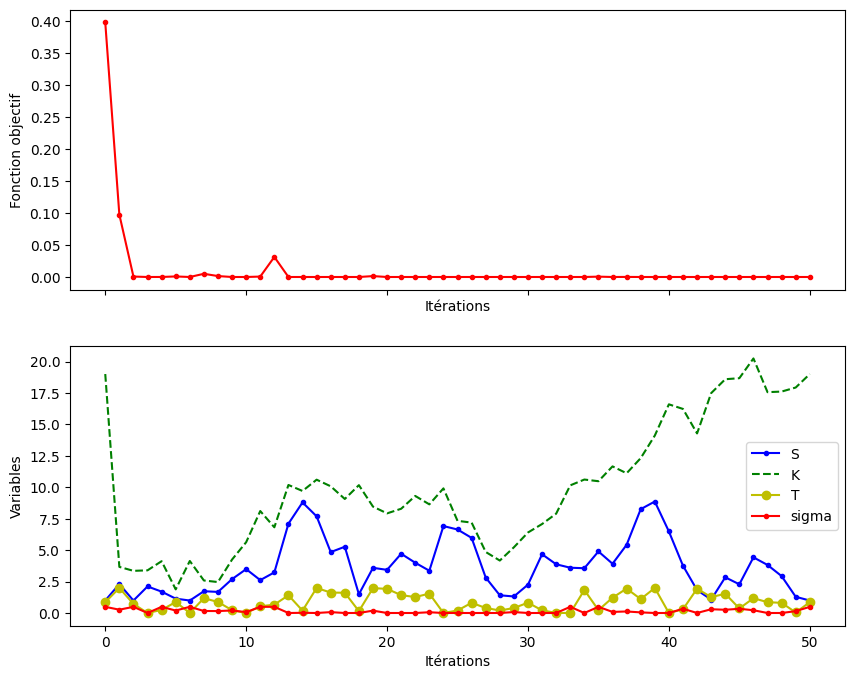

In [5]:
# Tracer la fonction objectif et les variables
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

ax1.plot(fs, 'r.-')
ax1.set_ylabel('Fonction objectif')
ax1.set_xlabel('Itérations')

ax2.plot(x[:, 0], 'b.-', label='S')
ax2.plot(x[:, 1], 'g--', label='K')
ax2.plot(x[:, 2], 'y-o', label='T')
ax2.plot(x[:, 3], 'r.-', label='sigma')
ax2.legend()

ax2.set_ylabel('Variables')
ax2.set_xlabel('Itérations')

# Visualiser
plt.show()


#### Commentaire et discussion

## L'algorithme Génetique

### Description de l'algorithme

L'algorithme génétique est une méthode d'optimisation inspirée par le processus biologique de l'évolution. Il est utilisé pour rechercher des solutions potentielles à des problèmes d'optimisation en imitant le processus de sélection naturelle, crossover génétique et mutation. En suivant  cette

* Initialisation de la Population : Créez une population initiale de solutions potentielles (appelées individus) de manière aléatoire ou heuristique.

* Évaluation de la Population : Évaluez chaque individu de la population en utilisant la fonction objectif du problème. La fonction objectif mesure la qualité de chaque solution.

* Sélection : Sélectionnez des individus de la population pour la reproduction en fonction de leur performance. Les individus performants ont plus de chances d'être sélectionnés, simulant ainsi le principe de survie des plus adaptés.

* Crossover (Croisement) : Appliquez un opérateur de croisement pour combiner les caractéristiques de deux individus sélectionnés. Cela simule le croisement génétique dans la reproduction biologique.

* Mutation : Appliquez un opérateur de mutation pour introduire des changements aléatoires dans les caractéristiques des individus. Cela ajoute une diversité à la population.

* Remplacement : Remplacez certains individus de la population par les nouveaux individus créés par croisement et mutation.

* Critère d'Arrêt : Répétez les étapes ci-dessus jusqu'à ce qu'un critère d'arrêt soit atteint, tel qu'un nombre maximal d'itérations ou la convergence vers une solution satisfaisante.

### Minimisation de la fonction par l'algorithme genetique

In [6]:
# Reimplementation de la fonction
def black_scholes(x, r, T, sigma):
    S = x[0]
    K = x[1]
    if S <= 0 or K <= 0 or T <= 0 or sigma <= 0:
        return float('inf')  # Return a large value for invalid input
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (math.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    obj = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return obj

In [7]:
# Fonction de profit pour la fonction Black-Scholes
def profit_t(ind, r, T, sigma):
    return -black_scholes(ind, r, T, sigma)  # Négatif car on veut maximiser le profit


# Fonction de génération de la population
def generer(nb, taille, r):
    population = np.zeros((nb, taille))
    for i in range(nb):
        population[i] = np.random.rand(taille)  # Génération aléatoire de la population
    return population

# Fonction de fitness pour la fonction Black-Scholes
def fitness(ind, r, T, sigma):
    return -black_scholes(ind, r, T, sigma)  # Négatif car on veut maximiser le profit

# Fonction d'évaluation de la population pour la fonction Black-Scholes
def profit_tot(pop, r, T, sigma):
    pro = []
    for p in pop:
        pro.append(profit_t(p, r, T, sigma))
    return pro



# Fonction de sélection à la Roulette
def roulette(pop, r, T, sigma):
    fitnesses = [fitness(ind, r, T, sigma) for ind in pop]
    somme = float(sum(fitnesses))
    rel_fitness = [f / somme for f in fitnesses]
    probs = [sum(rel_fitness[:i + 1]) for i in range(len(rel_fitness))]
    new_population = []
    for _ in range(2):  # Sélectionner 2 individus à chaque itération
        rand_val = random.random()
        for i, individual in enumerate(pop):
            if rand_val <= probs[i]:
                new_population.append(individual.copy())
                break
    return new_population


# Fonction de croisement pour la fonction Black-Scholes
def croisement(p1, p2):
    n = len(p1)
    rnd = random.randint(0, n - 1)
    child_1 = np.concatenate((p1[:rnd], p2[rnd:]))
    child_2 = np.concatenate((p2[:rnd], p1[rnd:]))
    return child_1, child_2

# Fonction de mutation pour la fonction Black-Scholes
def mutation(ind, r):
    og = ind.copy()
    n = len(ind)
    while True:
        rnd = random.randint(0, n - 1)
        ind[rnd] = np.random.rand()  # Mutation aléatoire entre 0 et 1
        if fitness(ind, r, T, sigma) >= 0:  # Assurez-vous que la nouvelle solution est valide
            break
        else:
            ind = og.copy()
    return ind


In [8]:
# Fonction principale de l'algorithme génétique pour la fonction Black-Scholes
def GA(nb, taille, r, afficher):
    Gen = generer(nb, taille, r)
    The_best_of_all = np.array([])
    The_best_score = float('-inf')
    best_score_progress = []
    for j in range(50):  # Vous pouvez ajuster le nombre d'itérations selon vos besoins
        next_Gen = []

        parents = roulette(Gen, r, T, sigma)
        child_1, child_2 = croisement(parents[0], parents[1])
        child_3 = mutation(child_1, r)
        child_4 = mutation(child_2, r)

        next_Gen.extend([child_1, child_2, child_3, child_4])

        Gen = np.array(next_Gen)
        best_score = max(profit_tot(Gen, r, T, sigma))
        The_best = Gen[np.argmax(profit_tot(Gen, r, T, sigma))]


        if best_score >= The_best_score:
            The_best_score = best_score
            The_best_of_all = The_best

        best_score_progress.append(best_score)
        if afficher:
            print("Iteration : {} ,Score : {} ,The best : {}".format(j, best_score, The_best.tolist()))

    print("\n \nThe best score is : {} ,Ind : {} ".format(The_best_score, The_best_of_all))

In [ ]:
# Exemple d'utilisation
r = 0.05  # Taux d'intérêt
T = 1.0 # Maturité
sigma = 0.2 # Volatilité
GA(nb=50, taille=4, r=r, afficher=True)

Iteration : 0 ,Score : -0.0 ,The best : [0.00021377412386469619, 0.5943198435301915, 0.5071875229918752, 0.7288343559618657]
Iteration : 1 ,Score : -0.0 ,The best : [4.9629291591690716e-05, 0.5457665638218874, 0.5071875229918752, 0.7288343559618657]
Iteration : 2 ,Score : -0.0 ,The best : [0.0001799099901736989, 0.5457665638218874, 0.3558298148567113, 0.7288343559618657]
Iteration : 3 ,Score : -0.0 ,The best : [3.03263394779707e-05, 0.2801988684018294, 0.3558298148567113, 0.7288343559618657]
Iteration : 4 ,Score : -0.0 ,The best : [0.00011129325826420011, 0.2801988684018294, 0.19399255295353868, 0.7288343559618657]
Iteration : 5 ,Score : -0.0 ,The best : [3.420848503288276e-05, 0.7084755159158799, 0.3558298148567113, 0.29398679720055765]
Iteration : 6 ,Score : -0.0 ,The best : [0.0001790843440344636, 0.728488689997566, 0.3558298148567113, 0.29398679720055765]
Iteration : 7 ,Score : -0.0 ,The best : [0.00013976748839783504, 0.728488689997566, 0.9709947745282106, 0.29398679720055765]
Ite

## Discussion et Conclusion

Premièrement, l'algorithme de recuit simulé a été appliqué pour minimiser la fonction Black-Scholes. Ces résultats ont été obtenus dans un temps relativement court de 20 secondes.

Deuxièmement, l'algorithme génétique a été utilisé pour résoudre le même problème, et les résultats sont également présentés : le meilleur score avec les paramètres associés. Cependant, cette approche a nécessité un temps plus long, soit 18 minutes, pour converger vers une solution.


*Performance Temporelle* :

L'algorithme de recuit simulé a montré une efficacité temporelle notable en obtenant des résultats compétitifs dans un laps de temps relativement court.
En revanche, l'algorithme génétique a nécessité un temps plus substantiel pour converger vers une solution, ce qui pourrait être attribuable à la nature itérative et stochastique de l'approche génétique.

*Efficacité de Convergence* :

La nature probabiliste du recuit simulé lui a permis d'explorer l'espace des solutions de manière plus aléatoire, évitant ainsi de rester piégé dans des optima locaux.
L'algorithme génétique, bien que puissant pour l'optimisation globale, peut parfois nécessiter plus de temps pour converger, en particulier pour des espaces de recherche complexes.

*Interprétation des Résultats* :

Les solutions optimales obtenues par les deux approches peuvent être évaluées et comparées en termes de cohérence avec le contexte du problème, de valeurs limites acceptables, et de sensibilité aux paramètres.




En conclusion, l'algorithme de recuit simulé semble être une option efficace pour résoudre le problème d'optimisation associé à la fonction Black-Scholes dans un laps de temps relativement court. Bien que l'algorithme génétique puisse fournir des solutions de grande qualité, il est important de considérer le compromis entre la qualité de la solution et le temps de calcul nécessaire.

Le choix entre ces approches dépend des contraintes spécifiques du problème, de la disponibilité des ressources computationnelles, et de la tolérance à la durée du processus d'optimisation. Dans certains cas, la rapidité d'exécution du recuit simulé peut être préférable, tandis que dans d'autres situations, où le temps n'est pas une contrainte critique, l'algorithme génétique peut être privilégié pour son potentiel d'exploration exhaustive de l'espace des solutions.